# Lab 3 - K-means and PCA

(principle component analysis)

https://hendrix-cs.github.io/csci285/labs/heart-disease.html

In [1]:
# Import pandas
import pandas as pd
pd.set_option('display.max_columns', None)

# Import seaborn
import seaborn as sns
%matplotlib inline

# Import SciKitLearn functions
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import standard 

# Apply the default theme
sns.set_theme()

## Step 1 - Dataset Understanding

Working with the Cleveland clinic testing dataset for diagnosing heart disease.

specifcally cleveland-testing.csv

In [2]:
c_t = pd.read_csv("cleveland-testing.csv")
c_t.head()

,age,female,chest_pain,rest_bps,cholesterol,high_fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_angina,vessels,heart_disease
0,57,False,asymptomatic,140,192,False,normal,148,False,0,False
1,56,True,atypical angina,140,294,False,hypertrophy,153,False,0,False
2,56,False,non-anginal pain,130,256,True,hypertrophy,142,True,1,True
3,44,False,atypical angina,120,263,False,normal,173,False,0,False
4,52,False,non-anginal pain,172,199,True,normal,162,False,0,False


In [3]:
print(f"Number of Rows: {len(c_t)}")
print(f"Shape (rows x cols): {c_t.shape}")

Number of Rows: 293
Shape (rows x cols): (293, 11)


In [4]:
c_t.dtypes

age                          int64
female                        bool
chest_pain                  object
rest_bps                     int64
cholesterol                  int64
high_fasting_blood_sugar      bool
rest_ecg                    object
maximum_heart_rate           int64
exercise_angina               bool
vessels                      int64
heart_disease                 bool
dtype: object

In [5]:
c_t.describe()

,age,rest_bps,cholesterol,maximum_heart_rate,vessels
count,293.000000,293.000000,293.000000,293.000000,293.000000
mean,54.365188,131.627986,246.522184,149.426621,0.658703
std,9.000747,17.750984,52.069603,22.877853,0.928746
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,55.000000,130.000000,241.000000,152.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,3.000000


## 1.1 Categorical Analysis

In [6]:
c_t['chest_pain'].value_counts()

asymptomatic        138
non-anginal pain     85
atypical angina      48
typical angina       22
Name: chest_pain, dtype: int64

In [7]:
c_t['rest_ecg'].value_counts()

normal              148
hypertrophy         141
wave abnormality      4
Name: rest_ecg, dtype: int64

In [8]:
c_t['heart_disease'].value_counts()

False    159
True     134
Name: heart_disease, dtype: int64

In [9]:
# three categorical against five numeric
# 'chest_pain', 'rest_ecg', 'heart_disease'
# 'age', 'rest_bps', 'cholesteral', 'maximum_heart_rate', 'vessels'

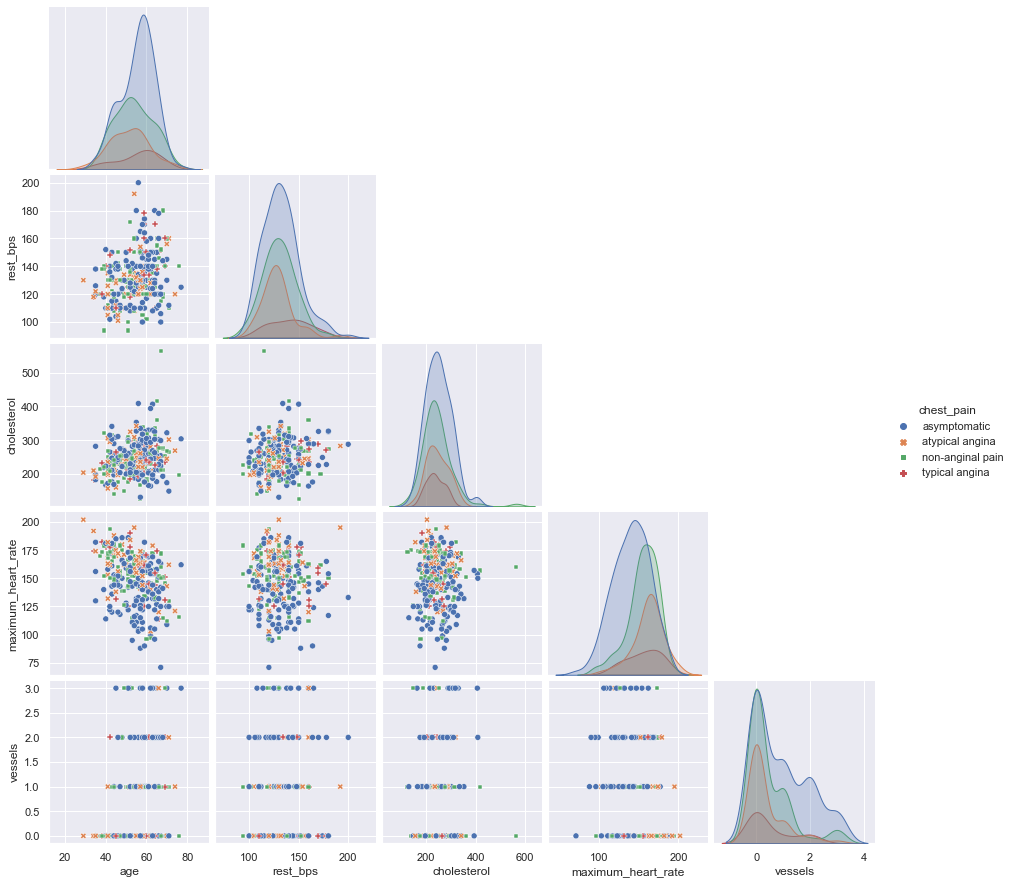

In [10]:
# dis = ['chest_pain', 'rest_ecg', 'heart_disease']
# dat = ['age', 'rest_bps', 'cholesterol', 'maximum_heart_rate', 'vessels']

# for x, y in enumerate(dat):
#     sns.pairplot(c_t, x_vars= dis[x], y_vars= y )
    
plot = sns.pairplot(
    data = c_t[['age', 'rest_bps', 'cholesterol', 'maximum_heart_rate', 'vessels', 'chest_pain']],
    hue = 'chest_pain',
    markers = True,
    corner = True
)


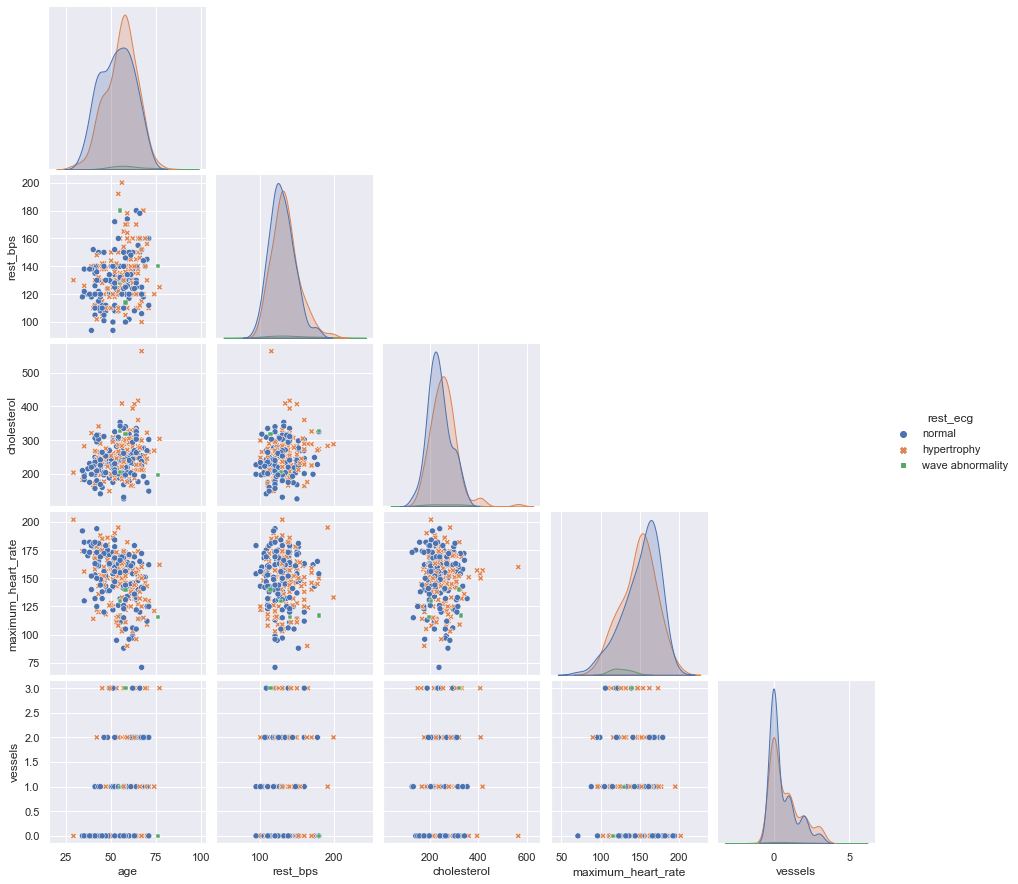

In [11]:
plot = sns.pairplot(
    data = c_t[['age', 'rest_bps', 'cholesterol', 'maximum_heart_rate', 'vessels', 'rest_ecg']],
    hue = 'rest_ecg',
    markers = True,
    corner = True
)


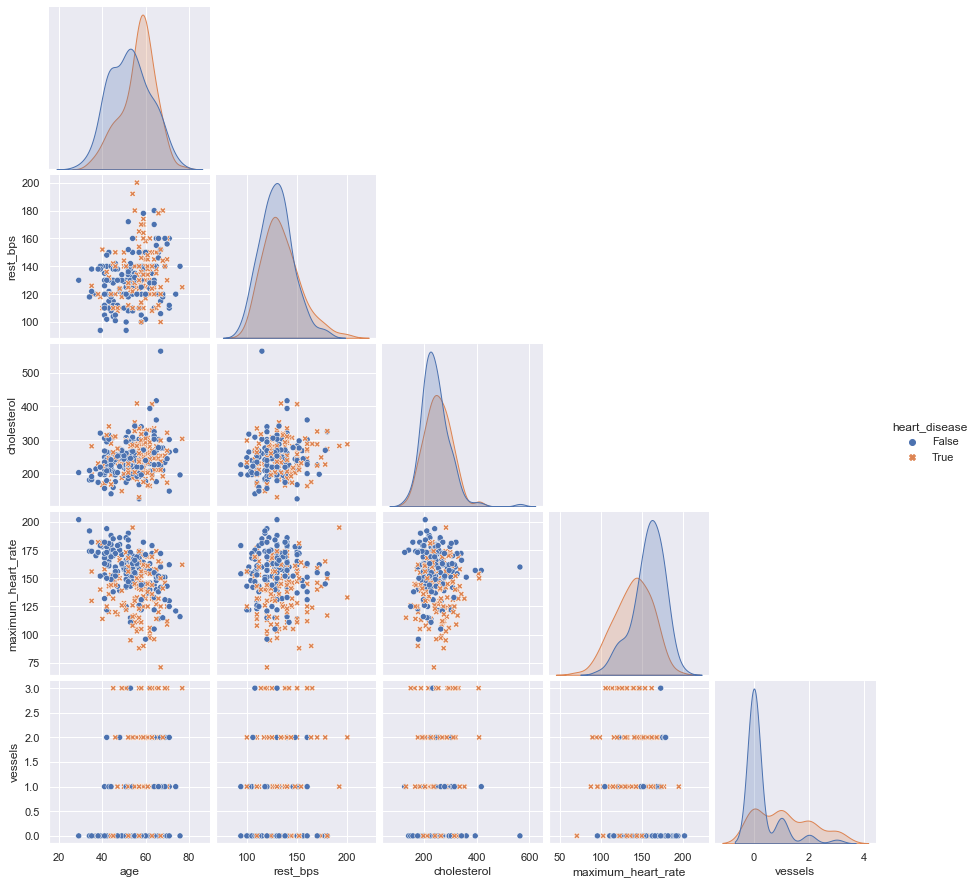

In [12]:
plot = sns.pairplot(
    data = c_t[['age', 'rest_bps', 'cholesterol', 'maximum_heart_rate', 'vessels', 'heart_disease']],
    hue = 'heart_disease',
    markers = True,
    corner = True
)


## Step 2 - K-means

In [13]:
# three categorical against five numeric
# 'chest_pain', 'rest_ecg', 'heart_disease'
# 'age', 'rest_bps', 'cholesterol', 'maximum_heart_rate', 'vessels'

# used:
# https://datascience.stackexchange.com/questions/48693/perform-k-means-clustering-over-multiple-columns

In [16]:
kmeans = KMeans(n_clusters=2)

y = kmeans.fit_predict(c_t[['age', 'rest_bps', 'cholesterol', 'maximum_heart_rate', 'vessels']])

# drop any nan values
# remember to scale your features, and store data in two new columns, appended to the original dataframe

# cluster - 0 or 1 and is the resulting labels from running K-Means.

# prediction - 0s and 1s into True/False values that align with the ground truth heart_disease column.

c_t['Cluster'] = y

# compare & contrast

# scaling so all datapoints are weighted the same
# held between -1 & 1


c_t.head()

,age,female,chest_pain,rest_bps,cholesterol,high_fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_angina,vessels,heart_disease,Cluster
0,57,False,asymptomatic,140,192,False,normal,148,False,0,False,0
1,56,True,atypical angina,140,294,False,hypertrophy,153,False,0,False,1
2,56,False,non-anginal pain,130,256,True,hypertrophy,142,True,1,True,0
3,44,False,atypical angina,120,263,False,normal,173,False,0,False,1
4,52,False,non-anginal pain,172,199,True,normal,162,False,0,False,0


In [20]:
c_t.groupby(['heart_disease',  'Cluster']).size()

heart_disease  Cluster
False          0          110
               1           49
True           0           75
               1           59
dtype: int64

In [ ]:
# http://nbviewer.org/github/Hendrix-CS/csci285/blob/master/assets/notebooks/Distance_Measures.ipynb

In [ ]:
# http://nbviewer.org/github/Hendrix-CS/csci285/blob/master/assets/notebooks/K-Means_Considerations.ipynb

## Step 3 - Confusion Matrix